In [1]:
using Pkg

In [2]:
Pkg.add("CSV")
using CSV

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


In [3]:
df = CSV.read("ebola-virus.csv")

,Date,total_cases,total_deaths,guinea_cases,guinea_deaths,liberia_cases,liberia_deaths,sierraleone_cases,sierraleone_deaths
,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰
1,25 Nov 2015,"28,637","11,314","3,804","2,536","10,675","4,808","14,122","3,955"
2,18 Nov 2015,"28,634","11,314","3,804","2,536","10,672","4,808","14,122","3,955"
3,11 Nov 2015,"28,635","11,314","3,805","2,536","10,672","4,808","14,122","3,955"
4,4 Nov 2015,"28,607","11,314","3,81","2,536","10,672","4,808","14,089","3,955"
5,25 Oct 2015,"28,539","11,298","3,806","2,535","10,672","4,808","14,061","3,955"
6,18 Oct 2015,"28,476","11,298","3,803","2,535","10,672","4,808","14,001","3,955"
7,11 Oct 2015,"28,454","11,297","3,8","2,534","10,672","4,808","13,982","3,955"
8,27 Sep 2015,"28,388","11,296","3,805","2,533","10,672","4,808","13,911","3,955"
9,20 Sep 2015,"28,295","11,295","3,8","2,532","10,672","4,808","13,823","3,955"


In [4]:
for i = 1:54
    println(df[i,1])
end

25 Nov 2015
18 Nov 2015
11 Nov 2015
4 Nov 2015
25 Oct 2015
18 Oct 2015
11 Oct 2015
27 Sep 2015
20 Sep 2015
13 Sep 2015
6 Sep 2015
30 Aug 2015
16 Aug 2015
9 Aug 2015
26 Jul 2015
12 Jul 2015
5 Jul 2015
28 Jun 2015
21 Jun 2015
14 Jun 2015
31 May 2015
17 May 2015
3 May 2015
19 Apr 2015
5 Apr 2015
22 Mar 2015
8 Mar 2015
22 Feb 2015
8 Feb 2015
25 Jan 2015
11 Jan 2015
28 Dec 2014
14 Dec 2014
30 Nov 2014
18 Nov 2014
2 Nov 2014
19 Oct 2014
12 Oct 2014
28 Sep 2014
14 Sep 2014
31 Aug 2014
16 Aug 2014
9 Aug 2014
30 Jul 2014
23 Jul 2014
14 Jul 2014
2 Jul 2014
17 Jun 2014
27 May 2014
12 May 2014
1 May 2014
14 Apr 2014
31 Mar 2014
22 Mar 2014


In [5]:
Pkg.add("Dates")
using Dates
Dates.DateTime(df[1,1], "d u y")

 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


2015-11-25T00:00:00

In [6]:
Date(df[1,1], "d u y")

2015-11-25

In [7]:
dateCol = df[:, 1]
dateCol[1]

"25 Nov 2015"

In [8]:
convertedDates = []
for i = 1:54
    push!(convertedDates, DateTime(dateCol[i], "d u y"))
end

In [9]:
convertedDates

54-element Array{Any,1}:
 2015-11-25T00:00:00
 2015-11-18T00:00:00
 2015-11-11T00:00:00
 2015-11-04T00:00:00
 2015-10-25T00:00:00
 2015-10-18T00:00:00
 2015-10-11T00:00:00
 2015-09-27T00:00:00
 2015-09-20T00:00:00
 2015-09-13T00:00:00
 2015-09-06T00:00:00
 2015-08-30T00:00:00
 2015-08-16T00:00:00
 ⋮                  
 2014-08-09T00:00:00
 2014-07-30T00:00:00
 2014-07-23T00:00:00
 2014-07-14T00:00:00
 2014-07-02T00:00:00
 2014-06-17T00:00:00
 2014-05-27T00:00:00
 2014-05-12T00:00:00
 2014-05-01T00:00:00
 2014-04-14T00:00:00
 2014-03-31T00:00:00
 2014-03-22T00:00:00

In [10]:
Dates.datetime2rata(convertedDates[1])

735927

In [11]:
dayssincemar22(x) = Dates.datetime2rata(x) - Dates.datetime2rata(convertedDates[54])
epidays = Int64[]
for i = 1:54
    push!(epidays, dayssincemar22(convertedDates[i]))
end

In [12]:
epidays

54-element Array{Int64,1}:
 613
 606
 599
 592
 582
 575
 568
 554
 547
 540
 533
 526
 512
   ⋮
 140
 130
 123
 114
 102
  87
  66
  51
  40
  23
   9
   0

In [13]:
df[:, 1] = epidays
df

,Date,total_cases,total_deaths,guinea_cases,guinea_deaths,liberia_cases,liberia_deaths,sierraleone_cases,sierraleone_deaths
,Int64,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰
1,613,"28,637","11,314","3,804","2,536","10,675","4,808","14,122","3,955"
2,606,"28,634","11,314","3,804","2,536","10,672","4,808","14,122","3,955"
3,599,"28,635","11,314","3,805","2,536","10,672","4,808","14,122","3,955"
4,592,"28,607","11,314","3,81","2,536","10,672","4,808","14,089","3,955"
5,582,"28,539","11,298","3,806","2,535","10,672","4,808","14,061","3,955"
6,575,"28,476","11,298","3,803","2,535","10,672","4,808","14,001","3,955"
7,568,"28,454","11,297","3,8","2,534","10,672","4,808","13,982","3,955"
8,554,"28,388","11,296","3,805","2,533","10,672","4,808","13,911","3,955"
9,547,"28,295","11,295","3,8","2,532","10,672","4,808","13,823","3,955"


In [14]:
CSV.write("ebola-virus-epidays.csv", df)

"ebola-virus-epidays.csv"

In [15]:
dfEpidays = CSV.read("ebola-virus-epidays.csv")

,Date,total_cases,total_deaths,guinea_cases,guinea_deaths,liberia_cases,liberia_deaths,sierraleone_cases,sierraleone_deaths
,Int64⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰
1,613,"28,637","11,314","3,804","2,536","10,675","4,808","14,122","3,955"
2,606,"28,634","11,314","3,804","2,536","10,672","4,808","14,122","3,955"
3,599,"28,635","11,314","3,805","2,536","10,672","4,808","14,122","3,955"
4,592,"28,607","11,314","3,81","2,536","10,672","4,808","14,089","3,955"
5,582,"28,539","11,298","3,806","2,535","10,672","4,808","14,061","3,955"
6,575,"28,476","11,298","3,803","2,535","10,672","4,808","14,001","3,955"
7,568,"28,454","11,297","3,8","2,534","10,672","4,808","13,982","3,955"
8,554,"28,388","11,296","3,805","2,533","10,672","4,808","13,911","3,955"
9,547,"28,295","11,295","3,8","2,532","10,672","4,808","13,823","3,955"


In [19]:
Pkg.add("Plots")
using Plots

 Resolving package versions...
 Installed RecipesBase ─────── v0.6.0
 Installed NaNMath ─────────── v0.3.2
 Installed Showoff ─────────── v0.2.1
 Installed PlotUtils ───────── v0.5.5
 Installed PlotThemes ──────── v0.3.0
 Installed Colors ──────────── v0.9.5
 Installed FixedPointNumbers ─ v0.5.3
 Installed ColorTypes ──────── v0.7.5
 Installed Plots ───────────── v0.23.2
 Installed Measures ────────── v0.3.0
 Installed Contour ─────────── v0.5.1
 Installed StaticArrays ────── v0.10.3
 Installed GR ──────────────── v0.38.1
  Updating `~/.julia/environments/v1.1/Project.toml`
  [91a5bcdd] + Plots v0.23.2
  Updating `~/.julia/environments/v1.1/Manifest.toml`
  [3da002f7] + ColorTypes v0.7.5
  [5ae59095] + Colors v0.9.5
  [d38c429a] + Contour v0.5.1
  [53c48c17] + FixedPointNumbers v0.5.3
  [28b8d3ca] + GR v0.38.1
  [442fdcdd] + Measures v0.3.0
  [77ba4419] + NaNMath v0.3.2
  [ccf2f8ad] + PlotThemes v0.3.0
  [995b91a9] + PlotUtils v0.5.5
  [91a5bcdd] + Plots v0.23.2
  [3cdcf5f2] + RecipesB

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1186


In [21]:
epidays = dfEpidays[:, 1]
allcases = dfEpidays[:, 2];

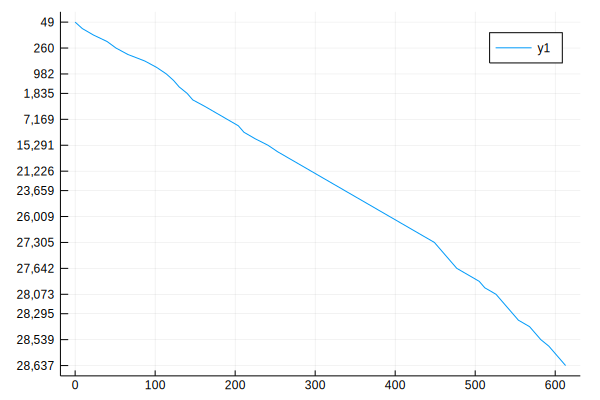

In [22]:
plot(epidays, allcases)

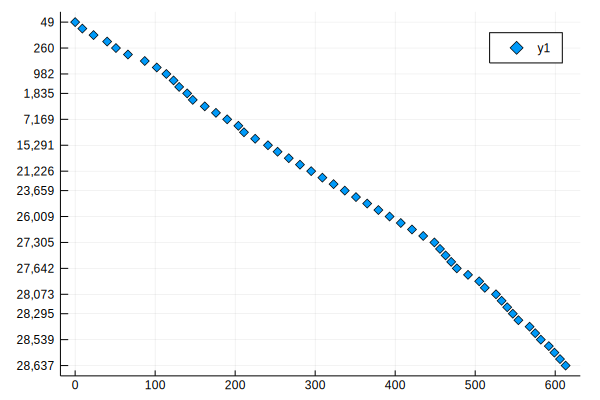

In [23]:
plot(epidays, allcases, linetype = :scatter, marker = :diamond)

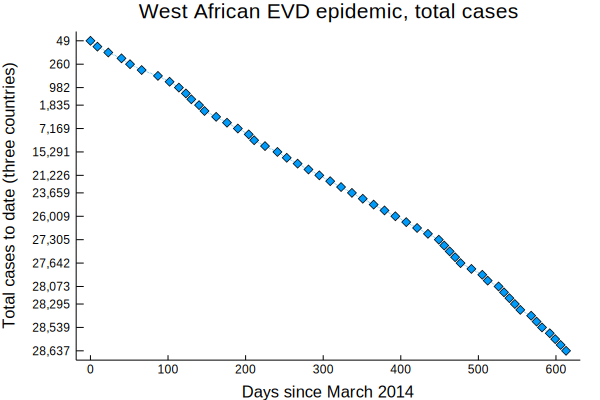

In [26]:
plot(epidays, allcases, # here are the data to plot
    title = "West African EVD epidemic, total cases",
    xlabel = "Days since March 2014",
    ylabel = "Total cases to date (three countries)",
    marker = (:diamond, 4),
    line = (:path, :dot),
    legend = false,
    grid = false
)

In [28]:
savefig("ebola-virus-epidays.png")

In [29]:
rows, cols = size(dfEpidays)

(54, 9)

In [40]:
for j = 1:cols
    for i = 1:rows
        if !all(isnumeric, string(dfEpidays[i, j]))
            dfEpidays[i, j] = 0
        end
    end
end

MethodError: MethodError: Cannot `convert` an object of type Int64 to an object of type String
Closest candidates are:
  convert(::Type{String}, !Matched::Union{CategoricalString{R}, CategoricalValue{T,R} where T} where R) at /home/anderson/.julia/packages/CategoricalArrays/ucKV2/src/value.jl:82
  convert(::Type{String}, !Matched::WeakRefStrings.WeakRefString) at /home/anderson/.julia/packages/WeakRefStrings/gPvrY/src/WeakRefStrings.jl:79
  convert(::Type{String}, !Matched::Tuple{Ptr{UInt8},Int64}) at /home/anderson/.julia/packages/Parsers/GKxCA/src/strings.jl:27
  ...

In [37]:
isnumeric("3")

MethodError: MethodError: no method matching isnumeric(::String)
Closest candidates are:
  isnumeric(!Matched::AbstractChar) at strings/unicode.jl:395

In [38]:
all(isnumeric, )

true